#  Distances et Algorithme k-NN

##  Introduction
 Les distances permettent de classer, regrouper ou identifier des points proches dans un espace donné.  
L'algorithme **k plus proches voisins (k-NN)** est basé sur ces distances.

---

##  Différentes distances

###  Distance de Hamming
- Utilisée pour comparer **deux chaînes binaires** ou catégorielles.
- Compte le **nombre de positions** où les éléments sont différents.
$$d(x, y) = \sum_{i\in I} |x_i - y_i|$$

In [9]:
# Distance de Hamming (binaire)
def hamming_distance(x, y):
    return sum(a != b for a, b in zip(x, y)) #compte le nombre de différences entre les deux chaines de caractères ou binaires
x="charlie"
y="Charlotte"
print(x, y , hamming_distance(x, y))
x=bin(125)
y=bin(475)
print(x, y , hamming_distance(x, y))



charlie Charlotte 3
0b1111101 0b111011011 3


In [10]:
# Example lists
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

# Using zip to combine lists
zipped = zip(list1, list2)

# Converting the zip object to a list of tuples
zipped_list = list(zipped)
print(zipped_list)

[(1, 'a'), (2, 'b'), (3, 'c')]


### Distance Euclidienne
- La plus utilisée en Machine Learning.
- Correspond à la **distance géométrique** classique entre deux points.

**Formule :**  
$$d(x, y) = \sqrt{\sum_{i\in I} (x_i - y_i)^2}$$


In [11]:
# Ensure numpy is installed
%pip install numpy
#Pour VSCode, il faut installer numpy dans le terminal avec la commande suivante : pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np

In [13]:
# Distance Euclidienne
def euclidean_distance(x, y):
    return np.sqrt(sum((a-b)**2 for a, b in zip(x, y))) #racine carrée de la somme des carrés des différences entre les deux points

# Test des distances avec deux points
x = np.array([1, 2, 3])
y = np.array([4, 0, 6])



print(f"Euclidean Distance: {euclidean_distance(x, y):.2f}")

Euclidean Distance: 4.69



---

### Distance de Manhattan
- Aussi appelée **Taxicab Distance**.
- Mesure la somme des différences absolues entre les coordonnées.

**Formule :**  
$$
d(x, y) = \sum |x_i - y_i|
$$



In [14]:
# Distance de Manhattan (Taxicab)
def manhattan_distance(x, y):
    return sum(abs(a-b) for a, b in zip(x, y)) #somme des valeurs absolues des différences entre les deux points
    
# Test des distances avec deux points
x = np.array([1, 2, 3])
y = np.array([4, 0, 6])

print(f"Manhattan Distance: {manhattan_distance(x, y)}")


Manhattan Distance: 8



###  Distance de Minkowski
- **Généralisation** des distances Euclidienne et Manhattan avec un paramètre \( p \).
- Pour \( p = 2 \), c'est la **distance Euclidienne**.
- Pour \( p = 1 \), c'est la **distance Manhattan**.

**Formule :**  
$$
d(x, y) = \left( \sum |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

In [15]:
# Distance de Minkowski (paramètre p)
def minkowski_distance(x, y, p=3):
    return sum(abs(a-b)**p for a, b in zip(x, y))**(1/p) #somme des valeurs absolues des différences entre les deux points à la puissance p

In [16]:
# Test des distances avec deux points
x = np.array([1, 2, 3])
y = np.array([4, 0, 6])

print(f"Minkowski Distance (p=3): {minkowski_distance(x, y, 3):.2f}")

Minkowski Distance (p=3): 3.96



##   Algorithme k-NN (k plus proches voisins)
L'algorithme k-NN est un modèle d'apprentissage supervisé basé sur la proximité des données.  

### Fonctionnement
1. Choisir un nombre k (exemple : k=3).
2. Calculer la distance entre le point inconnu et les autres points du dataset.
3. Sélectionner les **k plus proches voisins**.
4. Assigner la classe majoritaire parmi ces voisins.

---

### Exemple d’application
Un dataset contient trois classes : 🍎 pomme, 🍌 banane, 🍒 cerise.

| Poids (g) | Taille (cm)| Fruit  |
|-----------|------------|--------|
| 150       | 10         |🍎pomme |
| 130       | 9          |🍎pomme |
| 200       | 12         |🍌banane|
| 210       | 14         |🍌banane|
| 50        | 4          |🍒cerise|
  
On veut classer un fruit de 160g et 11cm.

1. **Calcul des distances** avec chaque fruit.  
2. **Sélection des 3 plus proches voisins (k=3)**.  
3. **Vote majoritaire → 🍎 (pomme)**.

➡ **Le fruit est donc classé comme une pomme !** 🍎

---

## Comparaison des distances
| Distance  | Avantages | Inconvénients |
|-----------|------------|---------------|
| **Hamming** | Simple, rapide | Seulement pour données catégorielles |
| **Euclidienne** | Naturelle, intuitive | Sensible aux valeurs extrêmes |
| **Manhattan** | Moins sensible aux valeurs extrêmes | Peut être moins précis |
| **Minkowski** | Paramétrable | Complexité plus élevée |





In [26]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ------------------------------
# Implémentation de k-NN
# ------------------------------

class KNN:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            # Calculer la distance entre x_test et tous les points dans X_train
            distances = []
            for x_train in X_test:
                for x_train,y_train in zip(self.X_train,self.y_train):
                    if self.distance_metric == "euclidean":
                        dist = euclidean_distance(x_test, x_train)
                    if self.distance_metric == "hamming":
                        dist = hamming_distance(x_test, x_train)
                    elif self.distance_metric == "manhattan":
                        dist = manhattan_distance(x_test, x_train)
                    elif self.distance_metric == "minkowski":
                        dist = minkowski_distance(x_test, x_train,3)
                    distances.append((dist, y_train))

                


            # Trier et récupérer les k plus proches voisins
            distances.sort()
            k_nearest = [label for _, label in distances[:self.k]]
            
            # Prédire la classe majoritaire
            predictions.append(Counter(k_nearest).most_common(1)[0][0])
            
        
        return np.array(predictions)
    

# ------------------------------
# Génération de données
# ------------------------------
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

print(X, y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------
# Comparaison avec k-NN de scikit-learn
# ------------------------------
# Initialiser les modèles
knn_custom = KNN(k=3, distance_metric="euclidean")
knn_sklearn = KNeighborsClassifier(n_neighbors=3)

# Entraîner les modèles
knn_custom.fit(X_train, y_train)
knn_sklearn.fit(X_train, y_train)

# Prédire les classes
y_pred_custom = knn_custom.predict(X_test)

print(y_pred_custom)

y_pred_sklearn = knn_sklearn.predict(X_test)



[[ 0.34881901 -1.80671372]
 [-0.36310016 -1.1075354 ]
 [ 1.40927009 -0.80772746]
 [ 1.63183215  1.11812006]
 [-0.87712912  2.71639998]
 [ 0.33041864  2.03325186]
 [-0.16848726  1.51164804]
 [ 1.94952901  0.5087877 ]
 [ 1.20571936 -0.90263054]
 [ 0.49447882 -0.61772816]] [0 0 0 1 1 1 1 1 0 0]
[0 0 1]


## Avantages et inconvénients de l’algorithme KNN

### Avantages

- Facile à mettre en œuvre: en raison de sa simplicité et de sa précision, le k-NN est l'un des premiers classificateurs appris par les débutants en science des données.

- S'adapte facilement: au fur et à mesure que de nouveaux échantillons d'entraînement sont ajoutés, l'algorithme s'ajuste pour inclure ces nouvelles données, car toutes les données d'entraînement sont conservées en mémoire.

- Peu d’hyperparamètres: k-NN ne nécessite qu'une valeur pour k et une métrique de distance, ce qui le rend relativement simple par rapport à d'autres algorithmes de machine learning.

### Inconvénients

- N’est pas très évolutif : k-NN étant un algorithme paresseux, il consomme davantage de mémoire et d'espace de stockage par rapport à d'autres classificateurs, ce qui peut s’avérer coûteux en termes de temps et d’argent. Plus de mémoire et de stockage entraînent des coûts supplémentaires pour l'entreprise, et le traitement de volumes de données plus importants peut prendre plus de temps. Bien que différentes structures de données, telles que Ball-Tree, aient été développées pour atténuer les inefficacités de calcul, un autre classificateur peut être plus adapté en fonction du problème à résoudre.

- La malédiction de la dimensionnalité : l'algorithme k-NN fonctionne mal avec des données d'entrée comportant de nombreuses dimensions. Ce phénomène est parfois appelé « phénomène de pic », où, après avoir atteint un nombre optimal de caractéristiques, l'ajout de nouvelles caractéristiques augmente les erreurs de classification, en particulier avec des échantillons de petite taille.

- Tendance au sur-ajustement :
en raison de cette malédiction de la dimensionnalité, le k-NN est également plus enclin au surajustement. Bien que des techniques de réduction de la dimensionnalité et de sélection des caractéristiques puissent être employées pour prévenir ce problème, la valeur de k a également un impact significatif sur le comportement du modèle. Des valeurs faibles de k peuvent entraîner un surajustement, tandis que des valeurs plus élevées ont tendance à « lisser » les prédictions en moyenne, mais si k est trop élevé, le modèle risque de sous-ajuster les données. 


 


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

data = pd.read_csv('C:/Users/LENOVO/Desktop/DataMining/Drug.csv')

# Defining the feature set and the target variable
X = data.drop(['Drug','Sex', 'BP', 'Cholesterol'], axis=1)
y = data['Drug']

# Identifying numerical and categorical features
numerical_features = ['Age', 'Na', 'K']
categorical_features = ['Sex', 'BP', 'Cholesterol']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

print(X_train.dtypes)
print(X_test.dtypes)

d1=X_train.to_numpy()
d2=X_test.to_numpy()
dy=y_train.to_numpy()

k=3
predictions = []
for x_test in d2:
    distances = []
    for x_train,y_t in zip(d2,dy):
            d = euclidean_distance(x_test, x_train)
            distances.append((d, y_t))
            # Trier et récupérer les k plus proches voisins
distances.sort()
    # Prédire la classe majoritaire
k_nearest = [label for (_, label) in distances[:k]]
predictions.append(Counter(k_nearest).most_common(1)[0][0])
        


          


Age      int64
Na     float64
K      float64
dtype: object
Age      int64
Na     float64
K      float64
dtype: object


In [19]:
k=8

# Création et entraînement du modèle
knn_custom = KNN(k=k, distance_metric="manhattan")
knn_custom.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred_custom = knn_custom.predict(X_test.to_numpy())

# Évaluation de la précision
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"🔍 Précision du k-NN personnalisé : {accuracy_custom:.2f}")



# ------------------------------
# 📌 Comparaison avec Scikit-Learn
# ------------------------------

knn_sklearn = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"🔍 Précision du k-NN (Scikit-Learn) : {accuracy_sklearn:.2f}")

print(y_test.iloc[8])

🔍 Précision du k-NN personnalisé : 0.32
🔍 Précision du k-NN (Scikit-Learn) : 0.42
drugA


In [20]:
# Détermination du nombre de classes
classes = np.unique(np.concatenate((y_test, y_pred_custom)))
num_classes = len(classes)

print(y_test.iloc[8])

data2=pd.DataFrame(np.zeros((num_classes, num_classes)),index=classes,columns=classes)
print(data2)

for i in range(len(y_test)):
    data2.at[y_test.iloc[i],y_pred_custom.item(i)] += 1

print
# Remplissage de la matrice de confusion
print(data2)


from sklearn.metrics import confusion_matrix


y_test  # Vraies classes
y_pred_custom  # Prédictions du modèle

# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_custom)
print(conf_matrix)


drugA
       drugA  drugB  drugC  drugX  drugY
drugA    0.0    0.0    0.0    0.0    0.0
drugB    0.0    0.0    0.0    0.0    0.0
drugC    0.0    0.0    0.0    0.0    0.0
drugX    0.0    0.0    0.0    0.0    0.0
drugY    0.0    0.0    0.0    0.0    0.0
       drugA  drugB  drugC  drugX  drugY
drugA    0.0    0.0    3.0    8.0   12.0
drugB    0.0    0.0    0.0    7.0    7.0
drugC    0.0    1.0    4.0    4.0    2.0
drugX    0.0    0.0    8.0   13.0   22.0
drugY    0.0    1.0   12.0   22.0   34.0
[[ 0  0  3  8 12]
 [ 0  0  0  7  7]
 [ 0  1  4  4  2]
 [ 0  0  8 13 22]
 [ 0  1 12 22 34]]


['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11460\3785942478.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(xaxe,yaxe,zaxe, c=new_y_pred_custom,cmap='viridis')


<Figure size 800x600 with 0 Axes>

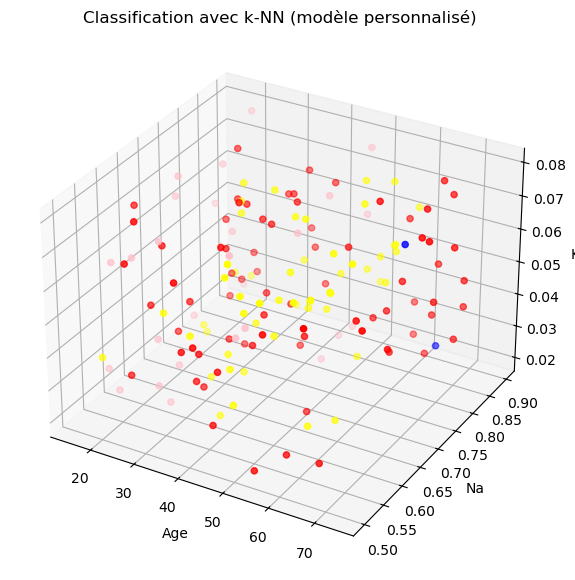

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11460\3785942478.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes2.scatter(xaxe,yaxe,zaxe, c=new_y_pred_sklearn,cmap='viridis')


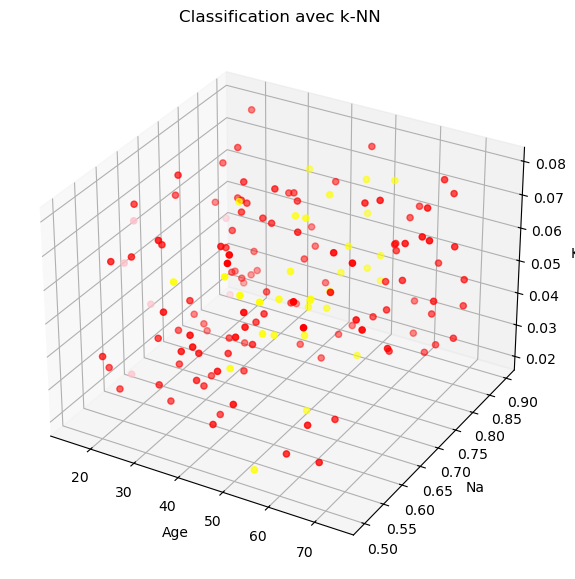

In [21]:
# ------------------------------
# 📌 Visualisation
# ------------------------------

plt.figure(figsize=(8, 6))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

# Notre jeu de données
xaxe = X_test.loc[:,'Age']
yaxe = X_test.loc[:,'Na']
zaxe = X_test.loc[:,'K']

# Créer un objet Axes3D pour le graphique 3D
fig=plt.figure(figsize=(10, 7))
axes = plt.axes(projection="3d")

colors=y.unique()
print(colors)

# Dictionnaire de remplacement
mapping = {'drugA': 'green','drugB':'blue', 'drugC':'pink', 'drugX':'yellow', 'drugY': 'red',}
# Fonction de remplacement
replace_func = np.vectorize(lambda x: mapping.get(x, x))

# Remplacement des valeurs
new_y_pred_custom = replace_func(y_pred_custom)
new_y_pred_sklearn=replace_func(y_pred_sklearn)

axes.scatter(xaxe,yaxe,zaxe, c=new_y_pred_custom,cmap='viridis')
plt.title("Classification avec k-NN (modèle personnalisé)")
plt.xlabel("Age")
plt.ylabel("Na")
axes.set_zlabel('K')

plt.show()

# Créer un objet Axes3D pour le graphique 3D
fig=plt.figure(figsize=(10, 7))
axes2 = plt.axes(projection="3d")

axes2.scatter(xaxe,yaxe,zaxe, c=new_y_pred_sklearn,cmap='viridis')
plt.title("Classification avec k-NN")
plt.xlabel("Age")
plt.ylabel("Na")
axes2.set_zlabel('K')

plt.show()

In [22]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
